# Classification: SVM


In [25]:
import pandas as pd
data = pd.read_csv('Dataset_v2.csv')

In [26]:
data.head()

,Prev_Insured_binary,Vehicle_damage_binary,< 1 Year,> 2 Years,Age_scaled,Target
0,0,1,0,0,0.369231,0
1,1,0,1,0,0.046154,0
2,0,1,0,0,0.353846,0
3,1,0,0,0,0.615385,0
4,0,1,0,0,0.338462,0


Target
0    69878
1    32473
dtype: int64


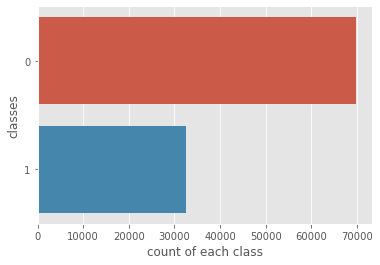

In [27]:
#Print class freq. through pandas 
print(data.groupby('Target').size())

#some imports to plot 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=data.Target ,data=data)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

In [28]:
#gives information about the data types,columns, null value counts, memory usage etc
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102351 entries, 0 to 102350
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Prev_Insured_binary    102351 non-null  int64  
 1   Vehicle_damage_binary  102351 non-null  int64  
 2   < 1 Year               102351 non-null  int64  
 3   > 2 Years              102351 non-null  int64  
 4   Age_scaled             102351 non-null  float64
 5   Target                 102351 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 4.7 MB


In [29]:
#basic statistic details about the data
data.describe(include="all")

,Prev_Insured_binary,Vehicle_damage_binary,< 1 Year,> 2 Years,Age_scaled,Target
count,102351.000000,102351.000000,102351.000000,102351.000000,102351.000000,102351.000000
mean,0.356938,0.611093,0.370070,0.054821,0.305651,0.317271
std,0.479099,0.487504,0.482825,0.227632,0.229781,0.465416
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.292308,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.461538,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
#Separate X and y (explanatory variables and target variable)
X = data.iloc[:,0:-1]
column_names = list(X) 
y = data.iloc[:,-1] 

#X.head()
#y.head()

In [31]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y,  #X_scaled
                                                    test_size =0.20, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y,
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape)

(81880, 5)


## SVM

![SVM](SVM.png)

We aim to resolve the following optimization problem:

\begin{align}\begin{aligned}\min_ {w, b, d} \frac{1}{2} ||w||^2 + C \sum_{i=1}^{m} d_i\\\begin{split}\textrm {subject to } & y_i (w^T \phi (x_i) - b) \geq 1 - d_i,\\
& d_i \geq 0\end{split}\end{aligned}\end{align}

where $\phi$ is the kernel map that can be chosen as 
 - linear: $\langle x, x'\rangle$
 - polynomial: $(\gamma \langle x, x'\rangle + r)^d$ where $\gamma,\, d ,\, r$ are specified by keyword gamma, degree and coef0 respectively.
 - radial basis function rbf: $\exp(-\gamma \|x-x'\|^2)$
 - neural networks (sigmoid): $\tanh(\gamma \langle x,x'\rangle + r)$

In [32]:
from sklearn.svm import SVC

model = SVC(kernel='linear',C=1)


# C : Penalty parameter C of the error term.
# kernel : kernel type. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).
# degree : Degree of the polynomial kernel function (‘poly’)
# gamma : Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
# coef0 : Independent term in kernel function.
# tol : Tolerance for stopping criterion.
# class_weight : Set the parameter C of class i to class_weight[i]*C for SVC.

In [33]:
model.fit(X_train, y_train)
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
#DEFINE YOUR CLASSIFIER and THE PARAMETERS GRID
from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear','rbf','polinomial'], "C":[0.1,1,100],"gamma":[1], "degree":[2,3,4]}

In [35]:
#DEFINE YOUR GRIDSEARCH 
'''
GS perfoms an exhaustive search over specified parameter values for an estimator.
GS uses a Stratified K-Folds cross-validator
(The folds are made by preserving the percentage of samples for each class.)
If refit=True the model is retrained on the whole training set with the best found params
'''
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, scoring = 'f1', verbose=50, n_jobs=-1, refit=True)

In [36]:
#TRAIN YOUR CLASSIFIER
gs = gs.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  8

In [37]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.688160 using {'C': 1, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
0.671080 (0.001492) with: {'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'linear'}
0.670061 (0.002539) with: {'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
nan (nan) with: {'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'polinomial'}
0.671080 (0.001492) with: {'C': 0.1, 'degree': 3, 'gamma': 1, 'kernel': 'linear'}
0.670061 (0.002539) with: {'C': 0.1, 'degree': 3, 'gamma': 1, 'kernel': 'rbf'}
nan (nan) with: {'C': 0.1, 'degree': 3, 'gamma': 1, 'kernel': 'polinomial'}
0.671080 (0.001492) with: {'C': 0.1, 'degree': 4, 'gamma': 1, 'kernel': 'linear'}
0.670061 (0.002539) with: {'C': 0.1, 'degree': 4, 'gamma': 1, 'kernel': 'rbf'}
nan (nan) with: {'C': 0.1, 'degree': 4, 'gamma': 1, 'kernel': 'polinomial'}
0.671080 (0.001492) with: {'C': 1, 'degree': 2, 'gamma': 1, 'kernel': 'linear'}
0.688160 (0.002409) with: {'C': 1, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
nan (nan) with: {'C': 1, 'deg

In [38]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

y_pred_train = best_model.predict(X_train)

In [16]:
#This is your prediction on the TEST SET
#y_pred

In [20]:
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
from sklearn.metrics import f1_score


In [23]:

print('***RESULTS ON TRAIN SET***')
print("f1_score: ", f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", f1_score(y_test, y_pred))

***RESULTS ON TRAIN SET***
f1_score:  0.6880353511903808
--
***RESULTS ON TEST SET***
f1_score:  0.6889559134954759


In [39]:
#PRINT SOME FURTHER METRICS
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81     13976
           1       0.59      0.83      0.69      6495

    accuracy                           0.76     20471
   macro avg       0.75      0.78      0.75     20471
weighted avg       0.80      0.76      0.77     20471



In [26]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[129  21]
 [ 38  43]]


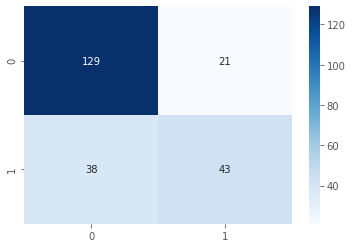

In [27]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); #annot=True to annotate cells fmt: format


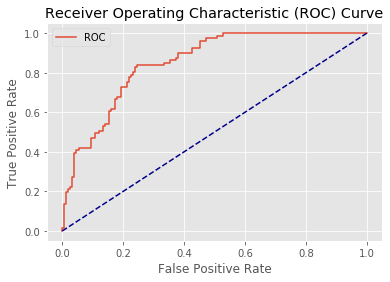

AUC: 0.85


In [28]:
from sklearn import metrics

model = SVC(C=0.1, gamma=0.0001, kernel='linear',probability=True)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)